# Block Generation Time

{'average': 235.57627118644066, 'max': 248.0, 'min': 228.0, 'variance': 10.041496201052016}
{'average': 215.83050847457628, 'max': 746.0, 'min': 10.0, 'variance': 33048.591466978374}


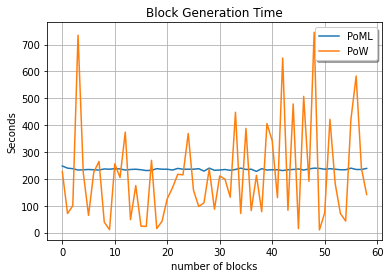

In [1]:
import matplotlib.pyplot as plt
import statistics as s

PoML_data = '2epoch_PoML_time.log'
PoW_data = 'PoW_time.log'
def math_result(results):
    results_data = {
        'average' : s.mean(results),
        'max' : max(results),
        'min' : min(results),
        'variance' : s.variance(results)
    }
    print(results_data)
    return results_data
    
def data_preprocess(log_data):
    timestamp_list = []
    with open(log_data, 'r') as f:
        for line in f:
            timestamp_list.append(float(line.rstrip()))

    previous = 0
    results = []
    for timestamp in timestamp_list:
        if previous == 0:
            previous = timestamp
            continue
        else:
            results.append(timestamp - previous)
        # print(f'{timestamp} - {previous} = {timestamp - previous}')
        previous = timestamp
    # print(results)

    block_number = []
    for i in range(len(timestamp_list) - 1):
        block_number.append(i)

    return block_number, results

# ----------SHOW FIGURE-----------
plt.grid(True)
plt.title('Block Generation Time')
plt.xlabel('number of blocks')
plt.ylabel('Seconds')

block_number, results = data_preprocess(PoML_data)
math_result(results)
plt.plot(block_number, results, label='PoML')

block_number, results = data_preprocess(PoW_data)
math_result(results)
plt.plot(block_number, results, label='PoW')

leg = plt.legend(loc='upper right', shadow=True) 
plt.show()

# Power Data

avarage watt: 34.03978060046189


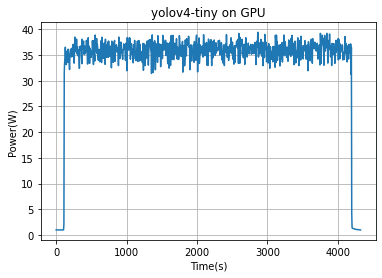

In [16]:
import matplotlib.pyplot as plt
import os

# GPU_power_log_file = 'full_data/pow_GPU_power.log'
log_data = 'full_data/keras_tensorflow_2022-02-24_01:09:20/GPU_power.log'
title = 'yolov4-tiny on GPU'

powerlist = []
time = []
with open(log_data, 'r') as f:
    for i, line in enumerate(f):
        # sw = f.find(" W")
        # if sw == -1:
        #     raise('No Watt get')
        # else:
        #     for i in range(100):
        #         line[sw-1]
        if i%5 == 0:
            # print(float(line[64:-2]))
            powerlist.append(float(line[64:-2]))
            time.append(i)
sum = 0 
for count, i in enumerate(powerlist):
    if count == 0:
        sum = i
        continue
    sum += i
print(f'avarage watt: {sum/len(powerlist)}')
        


#         powerlist.append(float(line.rstrip()))
# print(powerlist)
# time = []
# for i in range(len(powerlist)):
#     time.append(i)

plt.grid(True)
plt.plot(time, powerlist)
plt.title(title)
plt.xlabel('Time(s)')
plt.ylabel('Power(W)')
plt.savefig(log_data.split('.')[0:-1][0] + '.jpg', dpi=1000)
plt.show()

# Random Test

In [ ]:
import random
randomize = random.sample(range(0, 800), 195)
plt.grid(True)
plt.plot(block_number, randomize)
plt.title('Block Generation Time')
plt.xlabel('number of blocks')
plt.ylabel('Seconds')
plt.show()